# Python Project 04

Q1.	Import required libraries and read the dataset

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
data=pd.read_csv("Apps_data.csv")

Q2)	Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [273]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2495,Super Hearing Super Ear Amplifier,MEDICAL,4.1,21,20M,"1,000+",Free,0,Everyone,Medical,"June 11, 2018",1.1,4.1 and up
8218,DB Manager,PRODUCTIVITY,NaN,3,108k,"1,000+",Free,0,Everyone,Productivity,"January 21, 2014",2.0.0,3.1 and up
5913,BA4You,BUSINESS,2.1,87,26M,"5,000+",Free,0,Everyone,Business,"April 26, 2018",1.6.0.0,4.0 and up
2641,Meetup,SOCIAL,4.2,79130,23M,"5,000,000+",Free,0,Teen,Social,"August 2, 2018",3.10.26,4.4 and up
5904,A-Z Punjabi Songs & Music Videos 2018,FAMILY,4.3,367,5.1M,"100,000+",Free,0,Everyone,Entertainment,"May 17, 2018",1.0.19,4.1 and up


In [274]:
data.shape

(10841, 13)

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [276]:
data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Q3) Check summary statistics of the dataset. List out the columns that need to be worked upon for modelbuilding.

In [277]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [278]:
data.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [279]:
"""The Features that are required to be worked upon for model building are : """
print("1.. Category")
print("2. Rating")
print("3. Reviews")
print("4. Type")
print("5. Price")
print("6. Content Rating")

1.. Category
2. Rating
3. Reviews
4. Type
5. Price
6. Content Rating


Q4) Check if there are any duplicate records in the dataset? if any drop them

In [280]:
data.duplicated().sum()

483

In [281]:
data.drop_duplicates(inplace=True)

Q5) Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [282]:
data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [283]:
data[data["Category"]=="1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [284]:
data.drop(10472,inplace=True)

In [285]:
data.shape

(10357, 13)

Q6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)





In [286]:
data["Rating"].isnull().sum()

1465

In [287]:
data.drop(data[data["Rating"].isnull()].index,inplace=True)

In [288]:
data["Rating"].isnull().sum()

0

In [289]:
def Rating_category(value):
    if value <= 3.5:
        return "Low"
    elif value > 3.5:
        return "High"

In [290]:
data["Rating_category"] = data['Rating'].map(Rating_category)

In [291]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High


Q7) Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

<Axes: >

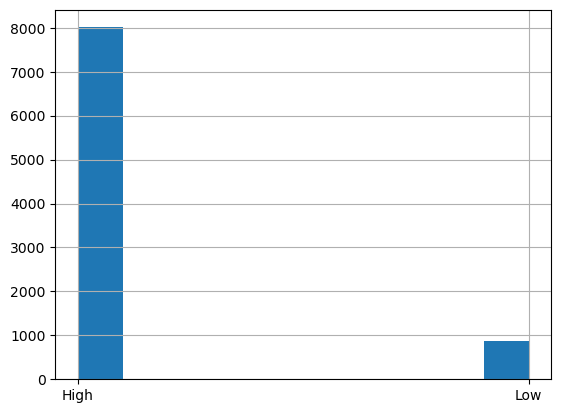

In [292]:
data["Rating_category"].hist()

Q8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)

In [293]:
data["Reviews"].dtypes

dtype('O')

In [294]:
data["Reviews"] = data["Reviews"].astype(int)

In [295]:
data["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int32

In [296]:
data["Reviews"].dtypes

dtype('int32')

<Axes: >

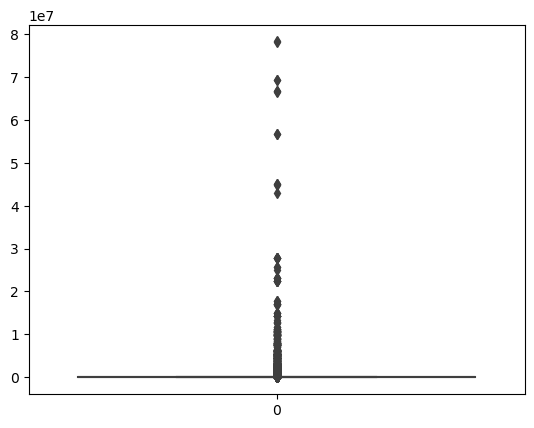

In [297]:
sns.boxplot(data["Reviews"])

In [298]:
data["Reviews"]=np.log10(data["Reviews"])

<Axes: >

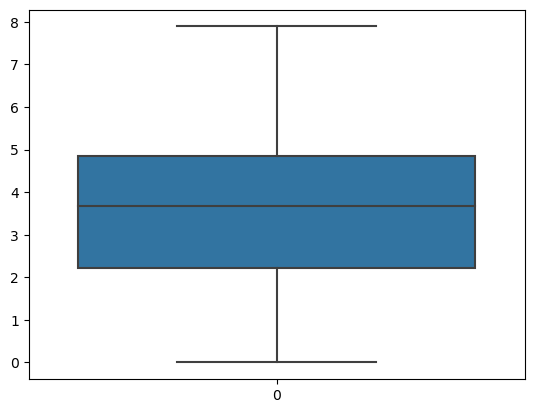

In [299]:
sns.boxplot(data["Reviews"])

Q9) The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')

In [300]:
data["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8892, dtype: object

In [301]:
data["Size"] = data["Size"].apply(lambda x : x.replace(".",""))

In [302]:
data["Size"] = data["Size"].str.replace("M","000000")

In [303]:
data["Size"] = data["Size"].str.replace("k","000")

In [304]:
data_drop=data[data["Size"] == "Varies with device"].index

In [305]:
data.drop(data_drop,inplace=True)

In [306]:
data.shape

(7424, 14)

In [307]:
data["Size"].convert_dtypes()

0        19000000
1        14000000
2        87000000
3        25000000
4        28000000
           ...   
10833      619000
10834    26000000
10836    53000000
10837    36000000
10840    19000000
Name: Size, Length: 7424, dtype: string

In [308]:
data["Size"].dtypes

dtype('O')

Q10) Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type

In [309]:
data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [310]:
data["Installs"] = data["Installs"].str.replace("+","")

C:\Users\Naga_\AppData\Local\Temp\ipykernel_19440\1601077647.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = data["Installs"].str.replace("+","")


In [311]:
data["Installs"] = data["Installs"].replace(",","")

In [312]:
data["Installs"]

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10833         1,000
10834           500
10836         5,000
10837           100
10840    10,000,000
Name: Installs, Length: 7424, dtype: object

In [313]:
data["Installs"].convert_dtypes()

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10833         1,000
10834           500
10836         5,000
10837           100
10840    10,000,000
Name: Installs, Length: 7424, dtype: string

Q11) Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [314]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [315]:
data["Price"] = data["Price"].apply(lambda x : x.replace(",",""))

In [316]:
data["Price"] = data["Price"].str.replace("$", "")

C:\Users\Naga_\AppData\Local\Temp\ipykernel_19440\2856083767.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Price"] = data["Price"].str.replace("$", "")


In [317]:
data["Price"].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [318]:
data["Price"].convert_dtypes()

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7424, dtype: string

Q12) Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [319]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [320]:
data.drop(["App","Rating","Genres","Last Updated","Current Ver","Android Ver"], axis = 1,inplace = True)

In [321]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,2.201397,19000000,"10,000",Free,0,Everyone,High
1,ART_AND_DESIGN,2.985426,14000000,"500,000",Free,0,Everyone,High
2,ART_AND_DESIGN,4.942058,87000000,"5,000,000",Free,0,Everyone,High
3,ART_AND_DESIGN,5.333737,25000000,"50,000,000",Free,0,Teen,High
4,ART_AND_DESIGN,2.985426,28000000,"100,000",Free,0,Everyone,High


Q13) Encode the categorical columns.

In [322]:
data.Category.nunique()

33

In [323]:
list(data["Category"].unique())

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [324]:
from sklearn.preprocessing import LabelEncoder

In [325]:
labelencoder = LabelEncoder()

In [326]:
data["Category"] = labelencoder.fit_transform(data["Category"])

In [327]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",Free,0,Everyone,High
1,0,2.985426,14000000,"500,000",Free,0,Everyone,High
2,0,4.942058,87000000,"5,000,000",Free,0,Everyone,High
3,0,5.333737,25000000,"50,000,000",Free,0,Teen,High
4,0,2.985426,28000000,"100,000",Free,0,Everyone,High


In [328]:
data.Category.value_counts()

11    1591
14     959
29     634
23     279
20     277
18     273
12     263
28     232
25     231
4      225
24     225
6      206
15     199
27     170
21     162
26     159
30     147
3      143
7      141
31     116
19      95
8       95
13      82
9       67
1       63
17      62
0       59
32      51
16      50
5       49
22      44
10      38
2       37
Name: Category, dtype: int64

In [329]:
data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [330]:
data["Content Rating"] = labelencoder.fit_transform(data["Content Rating"])

In [331]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",Free,0,1,High
1,0,2.985426,14000000,"500,000",Free,0,1,High
2,0,4.942058,87000000,"5,000,000",Free,0,1,High
3,0,5.333737,25000000,"50,000,000",Free,0,4,High
4,0,2.985426,28000000,"100,000",Free,0,1,High


In [332]:
data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [333]:
data["Type"] = labelencoder.fit_transform(data["Type"])

In [334]:
data["Type"].value_counts()

0    6877
1     547
Name: Type, dtype: int64

In [335]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",0,0,1,High
1,0,2.985426,14000000,"500,000",0,0,1,High
2,0,4.942058,87000000,"5,000,000",0,0,1,High
3,0,5.333737,25000000,"50,000,000",0,0,4,High
4,0,2.985426,28000000,"100,000",0,0,1,High


In [336]:
data["Rating_category"].unique()

array(['High', 'Low'], dtype=object)

In [337]:
data["Rating_category"].value_counts()

High    6599
Low      825
Name: Rating_category, dtype: int64

In [339]:
data["Rating_category"] = labelencoder.fit_transform(data["Rating_category"])

In [340]:
data["Rating_category"].value_counts()

0    6599
1     825
Name: Rating_category, dtype: int64

In [341]:
data.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,2.201397,19000000,"10,000",0,0,1,0
1,0,2.985426,14000000,"500,000",0,0,1,0
2,0,4.942058,87000000,"5,000,000",0,0,1,0
3,0,5.333737,25000000,"50,000,000",0,0,4,0
4,0,2.985426,28000000,"100,000",0,0,1,0


Q14) Segregate the target and independent features (Hint: Use Rating_category as the target)

In [342]:
X = data.drop("Rating_category", axis=1)
Y = data[["Rating_category"]]

In [345]:
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,2.201397,19000000,"10,000",0,0,1
1,0,2.985426,14000000,"500,000",0,0,1
2,0,4.942058,87000000,"5,000,000",0,0,1
3,0,5.333737,25000000,"50,000,000",0,0,4
4,0,2.985426,28000000,"100,000",0,0,1
...,...,...,...,...,...,...,...
10833,3,1.643453,619000,"1,000",0,0,1
10834,11,0.845098,26000000,500,0,0,1
10836,11,1.579784,53000000,"5,000",0,0,1
10837,11,0.602060,36000000,100,0,0,1


In [346]:
Y

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10833,0
10834,0
10836,0
10837,0


Q15. Split the dataset into train and test

In [348]:
from sklearn.model_selection import train_test_split

In [352]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [354]:
print("X_train")
X_train

X_train


,Category,Reviews,Size,Installs,Type,Price,Content Rating
8888,0,0.000000,29000000,100,0,0,1
1298,15,5.264019,57000000,"5,000,000",0,0,1
6599,20,2.489958,59000000,"10,000",0,0,1
7328,30,2.328380,61000000,"5,000",1,3.99,1
5681,18,1.755875,58000000,"10,000",0,0,1
...,...,...,...,...,...,...,...
1522,17,2.731589,99000000,"50,000",0,0,1
7755,11,1.462398,37000000,"1,000",0,0,2
5978,11,0.000000,20000000,50,1,1.49,1
347,6,6.679963,11000000,"500,000,000",0,0,1


In [355]:
print("X_test")
X_test

X_test


,Category,Reviews,Size,Installs,Type,Price,Content Rating
5708,29,2.845718,73000000,"100,000",0,0,1
7215,11,2.559907,14000000,"1,000",1,2.99,2
1350,15,4.852901,49000000,"1,000,000",0,0,1
5727,29,4.895583,63000000,"1,000,000",0,0,1
5326,11,3.997910,37000000,"100,000",0,0,4
...,...,...,...,...,...,...,...
6351,29,3.066699,350000,"100,000",0,0,1
1634,18,3.493319,13000000,"100,000",0,0,1
9865,3,1.518514,37000000,"1,000",0,0,1
10396,11,5.345748,94000000,"5,000,000",0,0,4


In [357]:
print("Y_train")
Y_train

Y_train


,Rating_category
8888,0
1298,0
6599,0
7328,0
5681,0
...,...
1522,0
7755,0
5978,1
347,0


In [358]:
print("Y_test")
Y_test

Y_test


,Rating_category
5708,0
7215,0
1350,0
5727,0
5326,0
...,...
6351,0
1634,0
9865,0
10396,0


Q16. Standardize the data, so that the values are within a particular range.

In [359]:
from sklearn.preprocessing import StandardScaler

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   int32  
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   object 
 3   Installs         7424 non-null   object 
 4   Type             7424 non-null   int32  
 5   Price            7424 non-null   object 
 6   Content Rating   7424 non-null   int32  
 7   Rating_category  7424 non-null   int64  
dtypes: float64(1), int32(3), int64(1), object(3)
memory usage: 435.0+ KB


In [363]:
scaler = StandardScaler()

In [364]:
data = scaler.fit_transform(data)

In [365]:
data

array([[-2.03766618, -0.67995305, -0.82651114, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.19653147, -1.02481157, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618,  1.0099001 ,  1.87037468, ..., -0.06305842,
        -0.46322046, -0.35358018],
       ...,
       [-0.68621673, -1.0632313 ,  0.52193177, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-0.68621673, -1.66608206, -0.15228969, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [ 0.17379656,  1.41571255, -0.82651114, ..., -0.06305842,
        -0.46322046, -0.35358018]])

In [366]:
data = pd.DataFrame(data)

In [367]:
data

,0,1,2,3,4,5,6,7
0,-2.037666,-0.679953,-0.826511,-0.168764,-0.282029,-0.063058,-0.463220,-0.35358
1,-2.037666,-0.196531,-1.024812,-0.158181,-0.282029,-0.063058,-0.463220,-0.35358
2,-2.037666,1.009900,1.870375,-0.060990,-0.282029,-0.063058,-0.463220,-0.35358
3,-2.037666,1.251404,-0.588551,0.910911,-0.282029,-0.063058,2.517665,-0.35358
4,-2.037666,-0.196531,-0.469570,-0.166820,-0.282029,-0.063058,-0.463220,-0.35358
...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.023974,-1.555503,-0.168958,-0.282029,-0.063058,-0.463220,-0.35358
7420,-0.686217,-1.516228,-0.548891,-0.168969,-0.282029,-0.063058,-0.463220,-0.35358
7421,-0.686217,-1.063231,0.521932,-0.168872,-0.282029,-0.063058,-0.463220,-0.35358
7422,-0.686217,-1.666082,-0.152290,-0.168977,-0.282029,-0.063058,-0.463220,-0.35358
